# QSVM with ZZ-feature map

In [1]:
# Generalimports:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Scikit learn imports:
from sklearn import datasets  #Houses a bunch of datasets.
from sklearn.model_selection import train_test_split  #Splits the data set into training and test set.
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Two types of scaling or regularizing (Standard ==> N(0,1)).
from sklearn.decomposition import PCA #We are going to use PCA for dimensionality reduction.
from sklearn.svm import SVC #The suppor vector classifier with a regularization parameter C
from sklearn.metrics import accuracy_score  #To determine the accuracy at the end.

In [3]:
# Data preperation:
import tensorflow
from tensorflow.keras.datasets import mnist
(X_tr, Y_tr),(X_te,Y_te) = mnist.load_data()

In [4]:
x_train = []
y_train = []
for i in range(len(Y_tr)):
    if Y_tr[i]== 4 or Y_tr[i]== 9:
        x_train.append(X_tr[i].flatten())
        y_train.append(Y_tr[i])
        
        
x_test = []
y_test = []
for i in range(len(Y_te)):
    if Y_te[i]== 4 or Y_te[i]== 9:
        x_test.append(X_te[i].flatten())
        y_test.append(Y_te[i])
        
X_train = np.array(x_train)
Y_train = np.array(y_train)
X_test = np.array(x_test)
Y_test = np.array(y_test)

In [5]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of Y_train is: ", Y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of Y_test is: ", Y_test.shape)

The shape of X_train is:  (11791, 784)
The shape of Y_train is:  (11791,)
The shape of X_test is:  (1991, 784)
The shape of Y_test is:  (1991,)


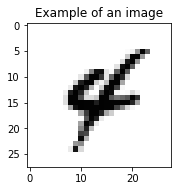

In [6]:
# Data point:  (point chosen at random from X_test)
x1 = (X_train[34]).reshape((28,28))

# Creating the plot:
pixel_plot = plt.figure()

# Plotting the plot
pixel_plot.add_axes([1,0.5,1,0.5])

# Title and configurations
plt.title("Example of an image")
pixel_plot = plt.imshow(x1, cmap = "Greys")

In [7]:
# Standardize
ss = StandardScaler()
X_train_ = ss.fit_transform(X_train)
X_test_ = ss.transform(X_test)

In [8]:
# Reduce dimensions
N_DIM = 12
pca = PCA(n_components=N_DIM)
X_train_ = pca.fit_transform(X_train_)
X_test_ = pca.transform(X_test_)

In [9]:
# Normalize
mms = MinMaxScaler((-1, 1))
X_train_ = mms.fit_transform(X_train_)
X_test_ = mms.transform(X_test_)

In [10]:
# Qiskit imports:
import qiskit

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

### Towards Classification:

In [11]:
zz_map_3 = ZZFeatureMap(feature_dimension=N_DIM, reps=1,entanglement='full')
zz_kernel_3 = QuantumKernel(feature_map=zz_map_3, quantum_instance=Aer.get_backend('statevector_simulator'))

In [12]:
matrix_train_3 = zz_kernel_3.evaluate(x_vec=X_train_)
matrix_test_3 = zz_kernel_3.evaluate(x_vec=X_test_, y_vec=X_train_)

In [13]:
zz_svc3 = SVC(kernel='precomputed')
zz_svc3.fit(matrix_train_3, Y_train)
zz_score3 = zz_svc3.score(matrix_test_3, Y_test)

print(f'ZZ kernel 3 classification test score: {zz_score3*100}%')

ZZ kernel 3 classification test score: 95.17830236062281%


### Visualizing:
Printing some test cases and looking at the misclassified cases.

____________________________________________________________________________________________
Example number:1
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:2
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:3
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:4
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:5
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:6
The actual label is:9
The predicted label is: [9]
________________________________________

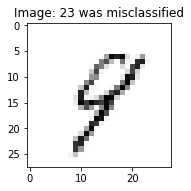

In [14]:
for i in range(50):
    x1_ = matrix_test_3[i].reshape(1, -1)
    print("____________________________________________________________________________________________")
    print(f"Example number:{i+1}")
    print(f"The actual label is:{Y_test[i]}")
    print(f"The predicted label is: {zz_svc3.predict(x1_)}")
    
    if int(zz_svc3.predict(x1_)) != Y_test[i]:
        x1 = (X_test[i]).reshape((28,28))
        pixel_plot = plt.figure()
        pixel_plot.add_axes([1,0.5,1,0.5])
        plt.title(f"Image: {i+1} was misclassified")
        pixel_plot = plt.imshow(x1, cmap = "Greys")
    
    

print(f'ZZ kernel 3 classification test score: {zz_score3*100}%')

### Results and Discussions:
Support Vector Machine enhanced with the ZZ-kernel gave an accuracy of 95.18% on the MNIST (4 vs 9) dataset after PCA was used to reduce the 784 dimensional data to 12. This was obtained after trying and testing multiple types (full, circular etc.) and number of repetetions of the Entanglement blocks. 